In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch

In [2]:
temp = np.array([0.6, 0.8, 1.0, 1.2, 1.5])

canon_aspirin_0_1M = {
    "Precision": np.array([88.51, 82.86, 75.82, 66.87, 52.11]),
    "Recall": np.array([1.03, 0.99, 0.91, 0.8, 0.62])
}

canon_aspirin_0_5M = {
    "Precision": np.array([88.53, 83.09, 75.73, 67.08, 52.13]),
    "Recall": np.array([4.55, 4.79, 4.44, 3.93, 3.02])
}

canon_aspirin_1M = {
    "Precision": np.array([88.55, 83.02, 75.65, 66.94, 52.26]),
    "Recall": np.array([8.13, 9.16, 8.61, 7.62, 5.83])
}

canon_aspirin_2M = {
    "Precision": np.array([88.54, 83.01, 75.7, 67.01, 52.18]),
    "Recall": np.array([13.7, 16.84, 16.28, 14.43, 10.88])
}

canon_aspirin_4M = {
    "Precision": np.array([88.54, 83.03, 75.68, 66.97, 52.20]),
    "Recall": np.array([21.63, 29.03, 29.23, 25.98, 19.40])
}

canon_aspirin_7M = {
    "Precision": [],
    "Recall": []
}

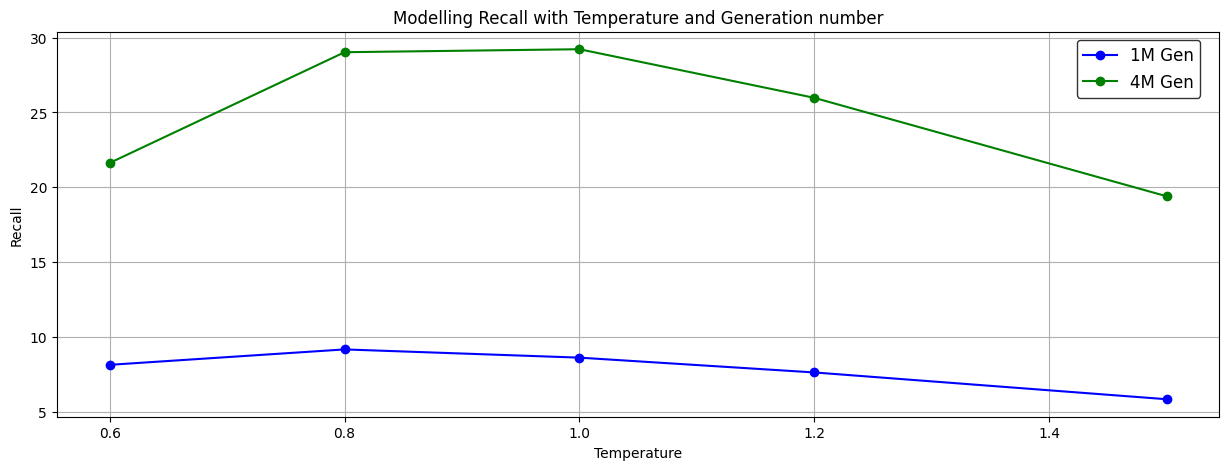

In [3]:
fig, axes = plt.subplots(1, figsize=(15, 5))

r1 = canon_aspirin_1M["Recall"]
r4 = canon_aspirin_4M["Recall"]

axes.plot(temp, r1, 'b-', marker='o', label='1M Gen')
axes.plot(temp, r4, 'g-', marker='o', label='4M Gen')

# curve_1M = r1 * np.exp(e - z[0,2] - a / (N[n]**alpha))
curve_4M = np.exp((r4 - r4[2])**2) 

# axes.plot(temp, curve_1M, label=f"Approximation 1M", linestyle='dashed', linewidth=0.7)
# axes.plot(temp, curve_4M, label=f"Approximation 4M", linestyle='dashed', linewidth=0.7)

axes.set_xlabel('Temperature')
axes.set_ylabel('Recall')
axes.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(0.87, 1), fontsize=12, edgecolor='black')
plt.title('Modelling Recall with Temperature and Generation number')

# plt.savefig('../plots/canon_aspirin_temp_modeling', format='pdf', bbox_inches='tight')

plt.show()

In [4]:
# temperatures
temp = np.log(np.array([0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.5, 1.7, 1.8]))
# recalls
r = np.array([0.42, 4.05, 8.13, 8.97, 9.16, 8.97, 8.61, 8.16, 7.62, 7.04, 5.83, 4.65, 4.09])

# subset length
s_len = 8_284_280
# validation set length
v_len = 10_000

# generation length
g = 1_000_000
# avg molecule probability of the validation set
p = np.array([0.000893])/10000

temp_5 = np.log(np.array([0.6, 0.8, 1.0]))
r_5 = np.array([8.13, 9.16, 8.61])
p_pred = np.array([8.064430463, 9.007976553, 8.430581777])

a = -0.22
b = 0.69
curve_1M = p_pred[-1]  * np.exp((-((temp - a)**2) + a**2) / b)
# curve_1M = [((1 - (1 - 0.001077/10000) ** g)* 100), ((1 - (1 - 0.000987/10000) ** g)* 100),  ((1 - (1 - 8.931722387321677e-08) ** g)* 100)]
# temp = [0.6, 0.8, 1]
# r = [8.13, 9.16, 8.61]


In [5]:
curve_1M

array([0.5510829 , 4.47887498, 7.99992096, 8.80164106, 9.04304893,
       8.87256584, 8.43058178, 7.82969076, 7.15225135, 6.45464582,
       5.12968688, 3.99653199, 3.51250891])

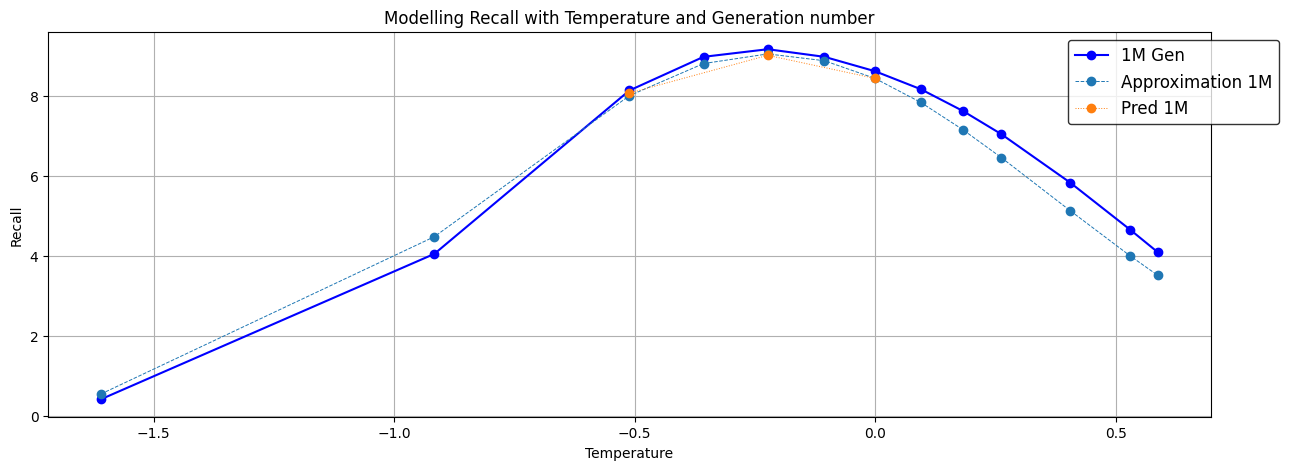

In [6]:
fig, axes = plt.subplots(1, figsize=(15, 5))

axes.plot(temp, r, 'b-', marker='o', label='1M Gen') 
axes.plot(temp, curve_1M, marker='o', label=f"Approximation 1M", linestyle='dashed', linewidth=0.7)
axes.plot(temp_5, p_pred, marker='o', label=f"Pred 1M", linestyle='dotted', linewidth=0.7)


axes.set_xlabel('Temperature')
axes.set_ylabel('Recall')
axes.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(0.87, 1), fontsize=12, edgecolor='black')
plt.title('Modelling Recall with Temperature and Generation number')
plt.show()

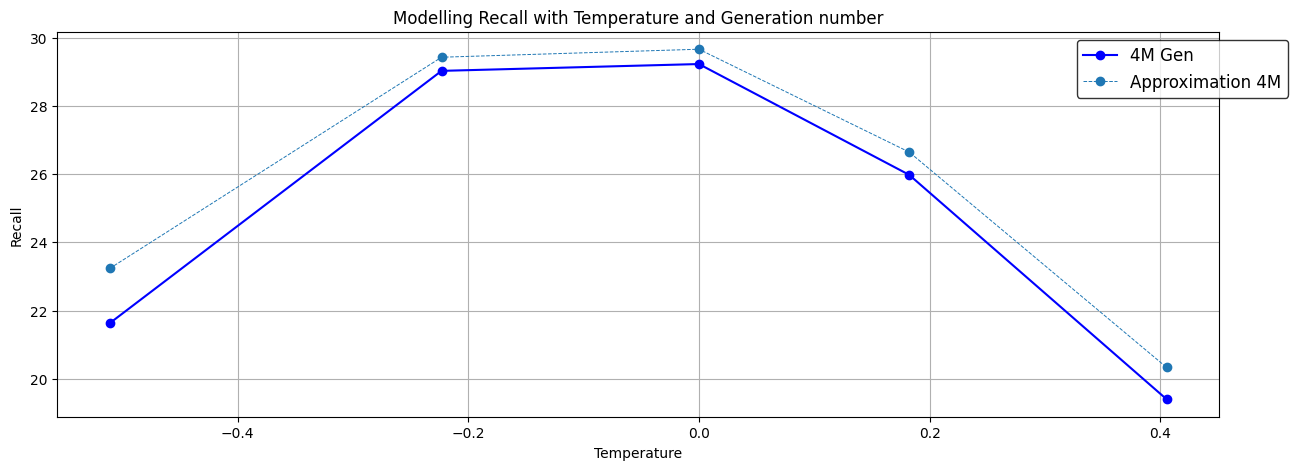

In [7]:
# temperatures
temp = np.log(np.array([0.6, 0.8, 1.0, 1.2, 1.5]))
# recalls
r = canon_aspirin_4M["Recall"]

# generation length
g = 4000000
# avg molecule probability of the validation set
p = np.array([0.000893] * g)
# subset length
s_len = 8284280
# validation set length
v_len = 10000


curve_4M = ((1 - (1 - p) ** g).sum() * np.exp(-((temp + 0.1)**2) / 0.65)) * s_len / v_len/110000000


fig, axes = plt.subplots(1, figsize=(15, 5))

axes.plot(temp, r, 'b-', marker='o', label='4M Gen') 
axes.plot(temp, curve_4M, marker='o', label=f"Approximation 4M", linestyle='dashed', linewidth=0.7)


axes.set_xlabel('Temperature')
axes.set_ylabel('Recall')
axes.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(0.87, 1), fontsize=12, edgecolor='black')
plt.title('Modelling Recall with Temperature and Generation number')
plt.show()

In [8]:
# Define the Huber loss function
def huber_loss(y_true, y_pred, delta=0.001):
    error = torch.abs(y_true - y_pred)
    quadratic_loss = 0.5 * error**2
    linear_loss = delta * (error - 0.5 * delta)
    loss = torch.where(error <= delta, quadratic_loss, linear_loss)
    return loss.sum()

In [9]:
def lbfgs(temp, recall, p, gen_len, n_iter, v_len, s_len, lr):
    temp = torch.tensor(temp, dtype=torch.float32)
    recall = torch.tensor(recall, dtype=torch.float32) 

    p = torch.tensor(p, dtype=torch.float32)
    g = torch.tensor(gen_len, dtype=torch.float32)
    s_len = torch.tensor(s_len, dtype=torch.float32)
    v_len = torch.tensor(v_len, dtype=torch.float32)
    
    # Initializing parameters to optimize
    a = torch.tensor(0.2, dtype=torch.float32, requires_grad=True)
    b = torch.tensor(0.68, dtype=torch.float32, requires_grad=True)
    c = torch.tensor(90000000, dtype=torch.float32, requires_grad=True)

    def closure():
        loss = 0
        optimizer.zero_grad()

        for i in range(len(temp)):
            pred_recall = ((1 - (1 - p) ** g).sum() * torch.exp(-((temp[i] + a) ** 2) / b)) * s_len / v_len / c

            loss += ((recall[i] - pred_recall) ** 2).mean()
            # loss += huber_loss(
            #     recall[i], pred_recall
            # )
            
        loss.backward()
        return loss
  

    optimizer = torch.optim.LBFGS([a, b, c], lr=lr, max_iter=n_iter)

    for i in range(n_iter):  
        loss = optimizer.step(closure)
        print(f"step={i}, loss={loss.item():.3f}, a={(a.item()):.3f}, b={(b.item()):.3f}, c={c.item():.3f}")

    return a.item(), b.item(), c.item()

In [10]:
temp = np.log(np.array([0.6, 0.8, 1.0, 1.2, 1.5]))

canon_aspirin_0_1M = {
    "Precision": np.array([88.51, 82.86, 75.82, 66.87, 52.11]),
    "Recall": np.array([1.03, 0.99, 0.91, 0.8, 0.62]),
}

canon_aspirin_0_5M = {
    "Precision": np.array([88.53, 83.09, 75.73, 67.08, 52.13]),
    "Recall": np.array([4.55, 4.79, 4.44, 3.93, 3.02])
}

canon_aspirin_1M = {
    "Precision": np.array([88.55, 83.02, 75.65, 66.94, 52.26]),
    "Recall": np.array([8.13, 9.16, 8.61, 7.62, 5.83])
}

canon_aspirin_2M = {
    "Precision": np.array([88.54, 83.01, 75.7, 67.01, 52.18]),
    "Recall": np.array([13.7, 16.84, 16.28, 14.43, 10.88])
}

canon_aspirin_4M = {
    "Precision": np.array([88.54, 83.03, 75.68, 66.97, 52.20]),
    "Recall": np.array([21.63, 29.03, 29.23, 25.98, 19.40])
}

# generation lengths
g_list = [100_000, 500_000, 1_000_000, 2_000_000, 4_000_000]

canon_aspirin_recalls = {
    100_000: np.array([1.03, 0.99, 0.91, 0.8, 0.62]), 
    500_000: np.array([4.55, 4.79, 4.44, 3.93, 3.02]), 
    1_000_000: np.array([8.13, 9.16, 8.61, 7.62, 5.83]), 
    2_000_000: np.array([13.7, 16.84, 16.28, 14.43, 10.88]), 
    4_000_000: np.array([21.63, 29.03, 29.23, 25.98, 19.40])
}

# avg molecule probability of the validation set
p = np.array([0.000893/10000 * 10000] * g)

# gen=1M, valid probs with diff temps
p_l = np.array([0.001077, 0.000987, 0.000893, 0.000785, 0.000605])

# subset length
s_len = 8284280
# validation set length
v_len = 10000
n_iter = 30
lr_list = [0.01, 0.01, 0.01, 0.01, 0.001]



In [11]:
d = {}

for g, lr in zip(g_list, lr_list):

    a, b, c = lbfgs(
        temp,
        canon_aspirin_recalls[g],
        np.array([0.000893/10000 * 10000] * g), 
        g,
        n_iter, 
        v_len,
        s_len,
        lr
    )

    d[g] = [a, b, c]
    print(f"===================== end gen {g} ========================")

/auto/home/knarik/miniconda3/envs/molgen/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


step=0, loss=0.070, a=0.211, b=0.747, c=90000000.000
step=1, loss=0.060, a=0.223, b=0.817, c=90000000.000
step=2, loss=0.051, a=0.235, b=0.890, c=90000000.000
step=3, loss=0.044, a=0.248, b=0.967, c=90000000.000
step=4, loss=0.039, a=0.260, b=1.044, c=90000000.000
step=5, loss=0.036, a=0.272, b=1.122, c=90000000.000
step=6, loss=0.033, a=0.284, b=1.200, c=90000000.000
step=7, loss=0.031, a=0.295, b=1.276, c=90000000.000
step=8, loss=0.029, a=0.306, b=1.347, c=90000000.000
step=9, loss=0.028, a=0.315, b=1.414, c=90000000.000
step=10, loss=0.027, a=0.324, b=1.475, c=90000000.000
step=11, loss=0.027, a=0.331, b=1.529, c=90000000.000
step=12, loss=0.027, a=0.337, b=1.574, c=90000000.000
step=13, loss=0.026, a=0.342, b=1.613, c=90000000.000
step=14, loss=0.026, a=0.346, b=1.645, c=90000000.000
step=15, loss=0.026, a=0.350, b=1.670, c=90000000.000
step=16, loss=0.026, a=0.352, b=1.690, c=90000000.000
step=17, loss=0.026, a=0.354, b=1.706, c=90000000.000
step=18, loss=0.026, a=0.356, b=1.718,

In [12]:
d

{100000: [0.359870582818985, 1.7496092319488525, 90000000.0],
 500000: [0.28250420093536377, 1.2153093814849854, 90000000.0],
 1000000: [0.20317824184894562, 0.7967839241027832, 90000000.0],
 2000000: [0.1350027173757553, 0.49831634759902954, 90000000.0],
 4000000: [0.12505030632019043, 0.32478535175323486, 90000000.0]}

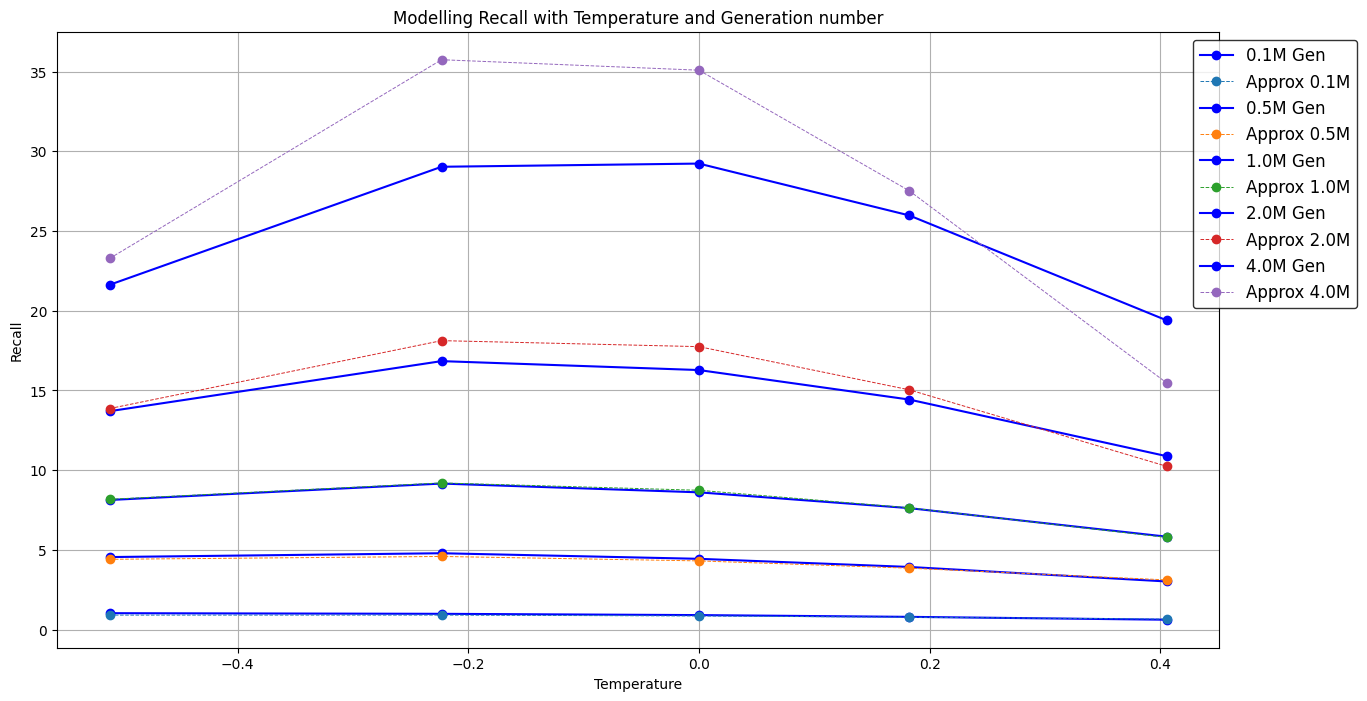

In [13]:
s_len = 8284280
v_len = 10000


g_list = [100_000, 500_000, 1_000_000, 2_000_000, 4_000_000]

temp = np.log(np.array([0.6, 0.8, 1.0, 1.2, 1.5]))

canon_aspirin_recalls = {
    100_000: np.array([1.03, 0.99, 0.91, 0.8, 0.62]), 
    500_000: np.array([4.55, 4.79, 4.44, 3.93, 3.02]), 
    1_000_000: np.array([8.13, 9.16, 8.61, 7.62, 5.83]), 
    2_000_000: np.array([13.7, 16.84, 16.28, 14.43, 10.88]), 
    4_000_000: np.array([21.63, 29.03, 29.23, 25.98, 19.40])
}


fig, axes = plt.subplots(1, figsize=(15, 8))

for g in g_list:
    p = np.array([0.000893] * g)

    a, b, c = d[g]

    curve = ((1 - (1 - p) ** g).sum() * np.exp(-((temp + a)**2) / b)) * s_len / v_len / c

    axes.plot(temp, canon_aspirin_recalls[g], 'b-', marker='o', label=f'{g/1000000}M Gen') 
    axes.plot(temp, curve, marker='o', label=f"Approx {g/1000000}M", linestyle='dashed', linewidth=0.7)


axes.set_xlabel('Temperature')
axes.set_ylabel('Recall')
axes.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(0.97, 1), fontsize=12, edgecolor='black')
plt.title('Modelling Recall with Temperature and Generation number')
plt.show()

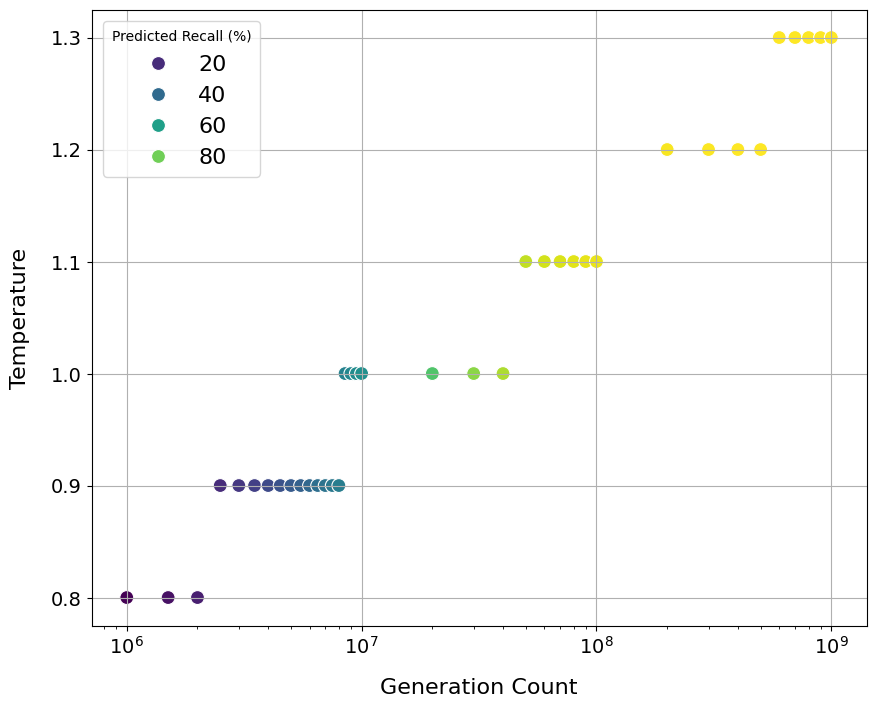

In [2]:


# Data from your table
data = {
    "0.6": [8.06, 11.01, 13.55, 15.80, 17.81, 19.64, 21.32, 22.86, 24.29, 25.62, 26.87, 28.05, 29.16, 30.20, 31.20, 32.14, 33.04, 33.90, 34.72, 46.22, 52.96, 57.60, 61.06, 63.78, 65.99, 67.84, 69.42, 70.79, 78.70, 82.46, 84.78, 86.38, 87.59, 88.53, 89.29, 89.92, 90.46],
    "0.7": [8.86, 12.47, 15.70, 18.62, 21.27, 23.69, 25.92, 27.99, 29.91, 31.70, 33.38, 34.95, 36.43, 37.83, 39.15, 40.40, 41.59, 42.72, 43.79, 58.26, 66.06, 71.05, 74.57, 77.19, 79.24, 80.89, 82.25, 83.40, 89.42, 91.91, 93.32, 94.24, 94.89, 95.39, 95.77, 96.09, 96.35],
    "0.8": [9.00, 12.93, 16.55, 19.89, 22.99, 25.86, 28.53, 31.02, 33.35, 35.53, 37.58, 39.51, 41.32, 43.03, 44.65, 46.19, 47.64, 49.01, 50.32, 67.27, 75.58, 80.47, 83.68, 85.94, 87.62, 88.91, 89.95, 90.79, 94.78, 96.22, 96.98, 97.46, 97.79, 98.03, 98.21, 98.36, 98.48],
    "0.9": [8.8, 12.77, 16.5, 19.99, 23.27, 26.35, 29.25, 31.98, 34.55, 36.98, 39.27, 41.44, 43.49, 45.43, 47.27, 49.01, 50.66, 52.23, 53.73, 72.74, 81.41, 86.09, 88.93, 90.82, 92.15, 93.13, 93.89, 94.49, 97.13, 97.99, 98.44, 98.7, 98.88, 99.01, 99.11, 99.19, 99.26],
    "1.0": [8.42, 12.28, 15.93, 19.38, 22.64, 25.73, 28.65, 31.42, 34.05, 36.54, 38.91, 41.15, 43.29, 45.32, 47.25, 49.09, 50.84, 52.51, 54.09, 74.58, 83.80, 88.56, 91.31, 93.04, 94.21, 95.04, 95.67, 96.15, 98.16, 98.77, 99.07, 99.24, 99.35, 99.43, 99.49, 99.53, 99.57],
    "1.1": [7.94, 11.60, 15.06, 18.35, 21.46, 24.42, 27.23, 29.90, 32.45, 34.86, 37.17, 39.36, 41.46, 43.45, 45.36, 47.18, 48.92, 50.58, 52.17, 73.22, 83.18, 88.46, 91.52, 93.43, 94.70, 95.59, 96.24, 96.73, 98.61, 99.11, 99.34, 99.46, 99.54, 99.59, 99.63, 99.66, 99.68],
    "1.2": [7.40, 10.80, 14.02, 17.07, 19.97, 22.72, 25.34, 27.83, 30.20, 32.47, 34.63, 36.69, 38.66, 40.54, 42.35, 44.07, 45.73, 47.31, 48.83, 69.63, 80.20, 86.18, 89.84, 92.21, 93.83, 94.97, 95.81, 96.44, 98.71, 99.22, 99.43, 99.54, 99.61, 99.65, 99.68, 99.71, 99.73],
    "1.3": [6.82, 9.93, 12.87, 15.66, 18.30, 20.81, 23.19, 25.47, 27.63, 29.70, 31.68, 33.57, 35.38, 37.12, 38.78, 40.38, 41.91, 43.38, 44.80, 64.75, 75.62, 82.21, 86.50, 89.44, 91.52, 93.06, 94.21, 95.10, 98.42, 99.14, 99.41, 99.54, 99.61, 99.66, 99.69, 99.72, 99.74],
    "1.4": [6.21, 9.02, 11.67, 14.18, 16.55, 18.81, 20.95, 23.00, 24.95, 26.81, 28.59, 30.30, 31.94, 33.51, 35.02, 36.48, 37.87, 39.22, 40.52, 59.28, 70.13, 77.10, 81.89, 85.33, 87.88, 89.83, 91.36, 92.57, 97.54, 98.75, 99.21, 99.42, 99.54, 99.61, 99.66, 99.69, 99.72],
    "1.5": [5.59, 8.10, 10.47, 12.70, 14.81, 16.81, 18.72, 20.54, 22.28, 23.94, 25.53, 27.06, 28.52, 29.94, 31.29, 32.60, 33.86, 35.08, 36.26, 53.65, 64.21, 71.33, 76.42, 80.23, 83.17, 85.49, 87.36, 88.89, 95.81, 97.83, 98.66, 99.07, 99.30, 99.44, 99.54, 99.60, 99.65],
}

# Convert to DataFrame
df = pd.DataFrame(data, index=[1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000, 5500000, 6000000, 6500000, 7000000, 7500000, 8000000, 8500000, 9000000, 9500000, 10000000, 20000000, 30000000, 40000000, 50000000, 60000000, 70000000, 80000000, 90000000, 100000000, 200000000, 300000000, 400000000, 500000000, 600000000, 700000000, 800000000, 900000000, 1000000000])

# Extract the maximum value from each row
df['Max Value'] = df.max(axis=1)

# Print the max values
# print(df['Max Value'])

l = [0.8]*3 + [0.9]*12 + [1]*7 + [1.1]*6 + [1.2]*4 + [1.3]*5

# Plot the data
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df.index, y=l, hue=df['Max Value'], palette='viridis', s=100)
# sns.heatmap(df['Max Value'].view(:), annot=True, fmt=".2f", cmap="viridis", cbar_kws={"label": "Performance Metric"})



# plt.xticks(fontsize=14, fontweight='light')
# plt.yticks(fontsize=14, fontweight='light')
plt.xscale('log')  # Use log scale for x-axis due to large range of generation counts
plt.xlabel('Generation Count')
plt.ylabel('Temperature')
# plt.title('Max Value vs. Generation Count')
plt.legend(title="Predicted Recall (%)", fontsize=16)
plt.grid(True)

ax = plt.gca()
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

plt.xlabel('Generation Count', fontsize=16, labelpad=15)  # labelpad adds space between label and axis
plt.ylabel('Temperature', fontsize=16, labelpad=15)

plt.savefig('recall_pred_temp.pdf')
plt.show()

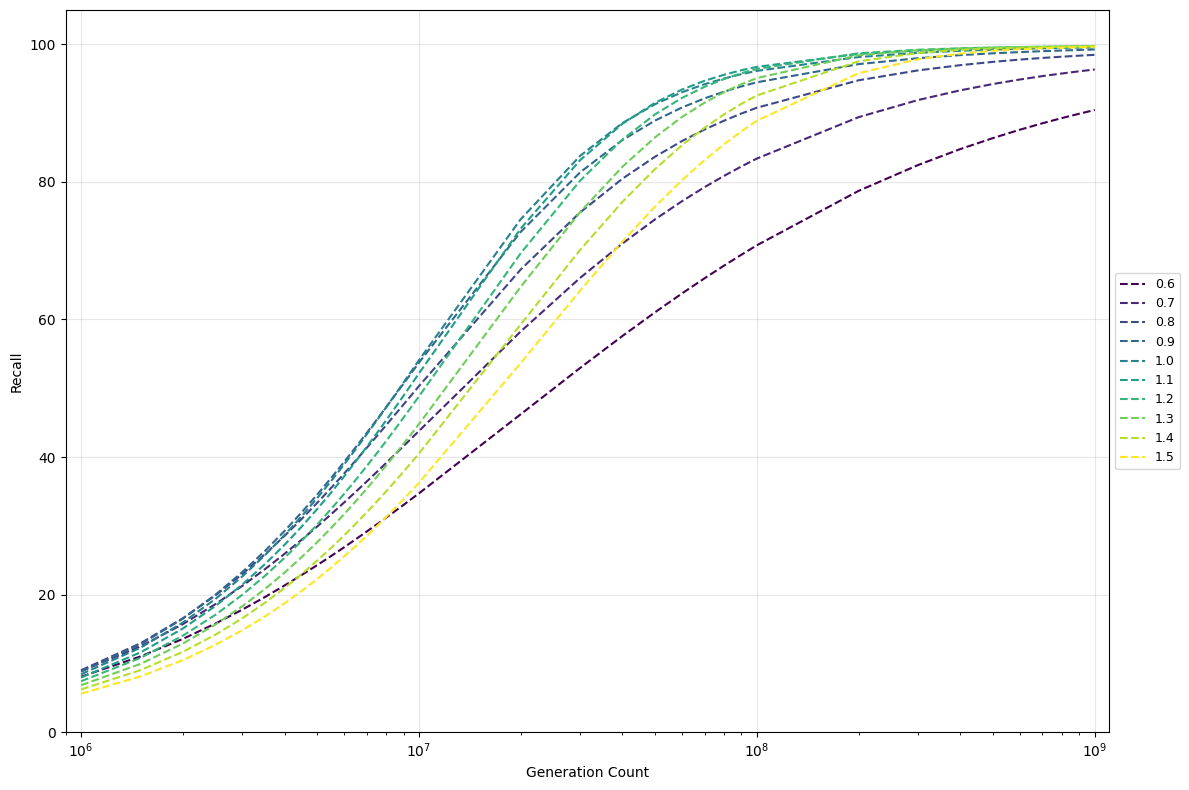

In [3]:
# Your data
data = {
    "0.6": [8.06, 11.01, 13.55, 15.80, 17.81, 19.64, 21.32, 22.86, 24.29, 25.62, 26.87, 28.05, 29.16, 30.20, 31.20, 32.14, 33.04, 33.90, 34.72, 46.22, 52.96, 57.60, 61.06, 63.78, 65.99, 67.84, 69.42, 70.79, 78.70, 82.46, 84.78, 86.38, 87.59, 88.53, 89.29, 89.92, 90.46],
    "0.7": [8.86, 12.47, 15.70, 18.62, 21.27, 23.69, 25.92, 27.99, 29.91, 31.70, 33.38, 34.95, 36.43, 37.83, 39.15, 40.40, 41.59, 42.72, 43.79, 58.26, 66.06, 71.05, 74.57, 77.19, 79.24, 80.89, 82.25, 83.40, 89.42, 91.91, 93.32, 94.24, 94.89, 95.39, 95.77, 96.09, 96.35],
    "0.8": [9.00, 12.93, 16.55, 19.89, 22.99, 25.86, 28.53, 31.02, 33.35, 35.53, 37.58, 39.51, 41.32, 43.03, 44.65, 46.19, 47.64, 49.01, 50.32, 67.27, 75.58, 80.47, 83.68, 85.94, 87.62, 88.91, 89.95, 90.79, 94.78, 96.22, 96.98, 97.46, 97.79, 98.03, 98.21, 98.36, 98.48],
    "0.9": [8.8, 12.77, 16.5, 19.99, 23.27, 26.35, 29.25, 31.98, 34.55, 36.98, 39.27, 41.44, 43.49, 45.43, 47.27, 49.01, 50.66, 52.23, 53.73, 72.74, 81.41, 86.09, 88.93, 90.82, 92.15, 93.13, 93.89, 94.49, 97.13, 97.99, 98.44, 98.7, 98.88, 99.01, 99.11, 99.19, 99.26],
    "1.0": [8.42, 12.28, 15.93, 19.38, 22.64, 25.73, 28.65, 31.42, 34.05, 36.54, 38.91, 41.15, 43.29, 45.32, 47.25, 49.09, 50.84, 52.51, 54.09, 74.58, 83.80, 88.56, 91.31, 93.04, 94.21, 95.04, 95.67, 96.15, 98.16, 98.77, 99.07, 99.24, 99.35, 99.43, 99.49, 99.53, 99.57],
    "1.1": [7.94, 11.60, 15.06, 18.35, 21.46, 24.42, 27.23, 29.90, 32.45, 34.86, 37.17, 39.36, 41.46, 43.45, 45.36, 47.18, 48.92, 50.58, 52.17, 73.22, 83.18, 88.46, 91.52, 93.43, 94.70, 95.59, 96.24, 96.73, 98.61, 99.11, 99.34, 99.46, 99.54, 99.59, 99.63, 99.66, 99.68],
    "1.2": [7.40, 10.80, 14.02, 17.07, 19.97, 22.72, 25.34, 27.83, 30.20, 32.47, 34.63, 36.69, 38.66, 40.54, 42.35, 44.07, 45.73, 47.31, 48.83, 69.63, 80.20, 86.18, 89.84, 92.21, 93.83, 94.97, 95.81, 96.44, 98.71, 99.22, 99.43, 99.54, 99.61, 99.65, 99.68, 99.71, 99.73],
    "1.3": [6.82, 9.93, 12.87, 15.66, 18.30, 20.81, 23.19, 25.47, 27.63, 29.70, 31.68, 33.57, 35.38, 37.12, 38.78, 40.38, 41.91, 43.38, 44.80, 64.75, 75.62, 82.21, 86.50, 89.44, 91.52, 93.06, 94.21, 95.10, 98.42, 99.14, 99.41, 99.54, 99.61, 99.66, 99.69, 99.72, 99.74],
    "1.4": [6.21, 9.02, 11.67, 14.18, 16.55, 18.81, 20.95, 23.00, 24.95, 26.81, 28.59, 30.30, 31.94, 33.51, 35.02, 36.48, 37.87, 39.22, 40.52, 59.28, 70.13, 77.10, 81.89, 85.33, 87.88, 89.83, 91.36, 92.57, 97.54, 98.75, 99.21, 99.42, 99.54, 99.61, 99.66, 99.69, 99.72],
    "1.5": [5.59, 8.10, 10.47, 12.70, 14.81, 16.81, 18.72, 20.54, 22.28, 23.94, 25.53, 27.06, 28.52, 29.94, 31.29, 32.60, 33.86, 35.08, 36.26, 53.65, 64.21, 71.33, 76.42, 80.23, 83.17, 85.49, 87.36, 88.89, 95.81, 97.83, 98.66, 99.07, 99.30, 99.44, 99.54, 99.60, 99.65],
}

x = np.array([1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000, 5500000, 
              6000000, 6500000, 7000000, 7500000, 8000000, 8500000, 9000000, 9500000, 10000000, 20000000, 
              30000000, 40000000, 50000000, 60000000, 70000000, 80000000, 90000000, 100000000, 200000000, 
              300000000, 400000000, 500000000, 600000000, 700000000, 800000000, 900000000, 1000000000])

# Create a figure and axis
plt.figure(figsize=(12, 8))
plt.grid(True, alpha=0.3)

# Create a colormap that goes from purple to orange
colors = plt.cm.viridis(np.linspace(0, 1, len(data)))

# Plot each curve
for i, (k, values) in enumerate(data.items()):
    color = colors[i]
    plt.semilogx(x, values, '--', color=color, label=f'{k}')
    
    # Add star markers for selected points (using the first, middle, and last points for demonstration)
    # You can adjust which points get marked
    # if k in ["0.6", "0.9", "1.2", "1.5"]:  # Select a few keys to highlight
    #     indices = [0, len(x)//2, -1]  # First, middle, and last point
    #     plt.plot([x[j] for j in indices], [values[j] for j in indices], '*', markersize=10, color=color)
        
    #     # Add annotations
    #     for j in indices:
    #         plt.annotate(f"{k}", xy=(x[j], values[j]), xytext=(x[j]*1.05, values[j]), 
    #                     color=color, fontsize=9)

# Set axis labels and title
plt.xlabel('Generation Count')
plt.ylabel('Recall')
# plt.title('')

# Set axis limits
plt.xlim(x[0]*0.9, x[-1]*1.1)
plt.ylim(0, 105)  # Assuming values are percentages that won't exceed 100

# Add a legend with smaller font size and place it outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

[0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]


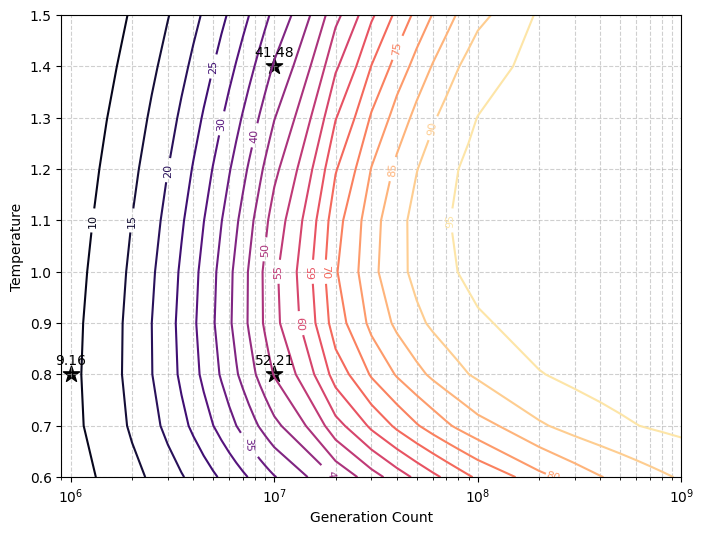

In [6]:
data = {
    "0.6": [8.06, 11.01, 13.55, 15.80, 17.81, 19.64, 21.32, 22.86, 24.29, 25.62, 26.87, 28.05, 29.16, 30.20, 31.20, 32.14, 33.04, 33.90, 34.72, 46.22, 52.96, 57.60, 61.06, 63.78, 65.99, 67.84, 69.42, 70.79, 78.70, 82.46, 84.78, 86.38, 87.59, 88.53, 89.29, 89.92, 90.46],
    "0.7": [8.86, 12.47, 15.70, 18.62, 21.27, 23.69, 25.92, 27.99, 29.91, 31.70, 33.38, 34.95, 36.43, 37.83, 39.15, 40.40, 41.59, 42.72, 43.79, 58.26, 66.06, 71.05, 74.57, 77.19, 79.24, 80.89, 82.25, 83.40, 89.42, 91.91, 93.32, 94.24, 94.89, 95.39, 95.77, 96.09, 96.35],
    "0.8": [9.00, 12.93, 16.55, 19.89, 22.99, 25.86, 28.53, 31.02, 33.35, 35.53, 37.58, 39.51, 41.32, 43.03, 44.65, 46.19, 47.64, 49.01, 50.32, 67.27, 75.58, 80.47, 83.68, 85.94, 87.62, 88.91, 89.95, 90.79, 94.78, 96.22, 96.98, 97.46, 97.79, 98.03, 98.21, 98.36, 98.48],
    "0.9": [8.8, 12.77, 16.5, 19.99, 23.27, 26.35, 29.25, 31.98, 34.55, 36.98, 39.27, 41.44, 43.49, 45.43, 47.27, 49.01, 50.66, 52.23, 53.73, 72.74, 81.41, 86.09, 88.93, 90.82, 92.15, 93.13, 93.89, 94.49, 97.13, 97.99, 98.44, 98.7, 98.88, 99.01, 99.11, 99.19, 99.26],
    "1.0": [8.42, 12.28, 15.93, 19.38, 22.64, 25.73, 28.65, 31.42, 34.05, 36.54, 38.91, 41.15, 43.29, 45.32, 47.25, 49.09, 50.84, 52.51, 54.09, 74.58, 83.80, 88.56, 91.31, 93.04, 94.21, 95.04, 95.67, 96.15, 98.16, 98.77, 99.07, 99.24, 99.35, 99.43, 99.49, 99.53, 99.57],
    "1.1": [7.94, 11.60, 15.06, 18.35, 21.46, 24.42, 27.23, 29.90, 32.45, 34.86, 37.17, 39.36, 41.46, 43.45, 45.36, 47.18, 48.92, 50.58, 52.17, 73.22, 83.18, 88.46, 91.52, 93.43, 94.70, 95.59, 96.24, 96.73, 98.61, 99.11, 99.34, 99.46, 99.54, 99.59, 99.63, 99.66, 99.68],
    "1.2": [7.40, 10.80, 14.02, 17.07, 19.97, 22.72, 25.34, 27.83, 30.20, 32.47, 34.63, 36.69, 38.66, 40.54, 42.35, 44.07, 45.73, 47.31, 48.83, 69.63, 80.20, 86.18, 89.84, 92.21, 93.83, 94.97, 95.81, 96.44, 98.71, 99.22, 99.43, 99.54, 99.61, 99.65, 99.68, 99.71, 99.73],
    "1.3": [6.82, 9.93, 12.87, 15.66, 18.30, 20.81, 23.19, 25.47, 27.63, 29.70, 31.68, 33.57, 35.38, 37.12, 38.78, 40.38, 41.91, 43.38, 44.80, 64.75, 75.62, 82.21, 86.50, 89.44, 91.52, 93.06, 94.21, 95.10, 98.42, 99.14, 99.41, 99.54, 99.61, 99.66, 99.69, 99.72, 99.74],
    "1.4": [6.21, 9.02, 11.67, 14.18, 16.55, 18.81, 20.95, 23.00, 24.95, 26.81, 28.59, 30.30, 31.94, 33.51, 35.02, 36.48, 37.87, 39.22, 40.52, 59.28, 70.13, 77.10, 81.89, 85.33, 87.88, 89.83, 91.36, 92.57, 97.54, 98.75, 99.21, 99.42, 99.54, 99.61, 99.66, 99.69, 99.72],
    "1.5": [5.59, 8.10, 10.47, 12.70, 14.81, 16.81, 18.72, 20.54, 22.28, 23.94, 25.53, 27.06, 28.52, 29.94, 31.29, 32.60, 33.86, 35.08, 36.26, 53.65, 64.21, 71.33, 76.42, 80.23, 83.17, 85.49, 87.36, 88.89, 95.81, 97.83, 98.66, 99.07, 99.30, 99.44, 99.54, 99.60, 99.65],
}

x = np.array([1e6, 1.5e6, 2e6, 2.5e6, 3e6, 3.5e6, 4e6, 4.5e6, 5e6, 5.5e6, 
              6e6, 6.5e6, 7e6, 7.5e6, 8e6, 8.5e6, 9e6, 9.5e6, 10e6, 20e6, 
              30e6, 40e6, 50e6, 60e6, 70e6, 80e6, 90e6, 100e6, 200e6, 300e6, 
              400e6, 500e6, 600e6, 700e6, 800e6, 900e6, 1e9])

y = np.array([float(k) for k in data.keys()])
Z = np.array([data[k] for k in data.keys()])
print(y)

# Create contour plot
plt.figure(figsize=(8, 6))
X, Y = np.meshgrid(x, y)
contour = plt.contour(X, Y, Z, levels=20, cmap="magma")

# plt.pcolormesh(X, Y, Z, shading='auto', cmap='magma')
# plt.colorbar(label='Performance (%)')


plt.clabel(contour, inline=True, fontsize=8)

# Add star marker 
plt.scatter(10**6, 0.8, color="black", marker="*", s=150, label="9.16")
plt.text(10**6, 0.82, "9.16", fontsize=10, ha="center", color="black")

plt.scatter(10**7, 0.8, color="black", marker="*", s=150, label="52.21")
plt.text(10**7, 0.82, "52.21", fontsize=10, ha="center", color="black")

plt.scatter(10**7, 1.4, color="black", marker="*", s=150, label="41.48")
plt.text(10**7, 1.42, "41.48", fontsize=10, ha="center", color="black")

plt.xlim(900000, 1e9)
# plt.yticks([0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5])

# Log scale for axes
plt.xscale("log")
# plt.yscale("log")

# Labels and title
plt.xlabel("Generation Count")
plt.ylabel("Temperature")
# plt.title("Contour Plot Example")

plt.grid(True, which="both", linestyle="--", alpha=0.6)


plt.show()

In [35]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [36]:
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [37]:
b = a[::-1, ::-1]

In [38]:
b

array([[9, 8, 7],
       [6, 5, 4],
       [3, 2, 1]])

In [40]:
b[::-1, ::-1]

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [41]:
x = "20"

In [43]:
y = "30"

In [44]:
x > y

False

In [45]:
class A:
    name = "valod"

    def __init__(self, n):
        self.n = n
        print(self.name)

a = A(4)


valod


In [55]:
list(range(-13, -20, -1))

[-13, -14, -15, -16, -17, -18, -19]